## Features and polynomial regression

Choice of features that we have and how can we get different learning algorithms by choosing approriate features. And in particulalr about polynomial regresion which allows us to use linear regresion to fit very complicated and ussualy non-linear functions. 

Let's tak a look at our toy sample case for housing prices prediction

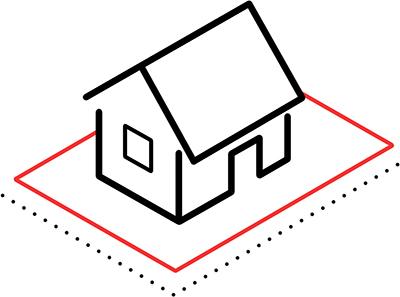

$$ h_{\theta}(x) = \theta_{0} + \theta_{1} \times \text{frontage}+ \theta_{2} \times \text{depth} $$

We have two features, the frontage and depth of the house (the length and width of slot of house land property)
With these two feature we can build linear regresion model, but we don't necessary need to use the features we are given. We can create new features by ourselves, if we decide that what really determines the size of house is <code>**area**</code>:  
$$ x = \text{frontage} \times \text{depth}$$

So we can select our hypothesis as this:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

Depending on what insight you might have into a particular problem rather than just taking the features sometimes by defining new features we can get a better model.

## Polynomial regression

Closely related to the concept of feature choice is <code>**polynomial regression**</code>.

For example if we have a housing price data that might look like this:

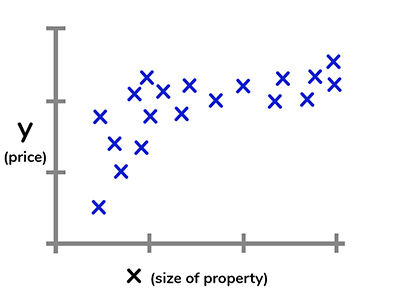

There are <code>**DIFFERENT MODEL**</code> that we might fit to this. That means that our hypothesis function doesn't need not be linear <code>**a straight line**</code> if that does not fit the data well. Thus we can change the curve of our hypothesis function by making it a <code>**quadratic, cubic or square root function**</code> or any other polynomial form.

<code>**Quadratic**</code>
\begin{multline*}
\theta_{0} + \theta_{1}x + \theta_{2}x^2
\end{multline*}
<br>

<code>**Cubic**</code>
\begin{multline*}
\theta_{0} + \theta_{1}x + \theta_{2}x^2 + \theta_{3}x^3
\end{multline*}

<code>**Square root**</code>
\begin{multline*}
\theta_{0} + \theta_{1}x + \theta_{2}\sqrt{x} + \theta_{3}x^3
\end{multline*}

We actually fit a model like this to our data by using machinery of multivariant linear regession we can do this with a pretty simple modification to our algorithm. 
Let's say our hypothesis function is:<br>

The form of the hypothesis looks like this:
\begin{multline*}
h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^2 + \theta_{3}x^3 = \theta_{0} + \theta_{1}\text{(size)} + \theta_{2}\text{size}^2 + \theta_{3}\text{size}^3 
\end{multline*}
<br>
\begin{multline*}
x_{1} = \text{(size)} 
\end{multline*}
\begin{multline*}
x_{2} = \text{(size)}^2 
\end{multline*}
\begin{multline*}
x_{3} = \text{(size)}^3
\end{multline*}

In order to map these two definitions to each other the natural way to do that is to set the first feature x one to be size of the house, x two to be the size squared size and x three to be cubed size. And just by choosing my three features this way and applying the machinery of linear regression we can fit this model and end up with cubic fit to our data.
<code>**NOTE**</code> if we choose our features like this then feature scaling becomes increasingly important. 

<code>**size of the house ranges from 1 to 1000 sq. m**</code> 
<br>

<code>**size of sq ranges from 1 - 1 000 000**</code> 
<br>

<code>**size of cube ranges from 1 - 10 power to the 9**</code> 

Three features take on very dirrent range of values and its important to apply feature scaling if we are using gradient descent we must get them in confortable ranges of values.


Another reasonable example of another choice might be to use square root maybe there will be some value of theta parameters
that will let you take this model and fit a curve that looks like that and doesn't flatten:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}\text{(size)}+ \theta_{2}\sqrt{(size)}$$

# Polynomial model implementation

## Practice example I

In [318]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Polynomial functions and their graphs:

 1) Graph for X = Y

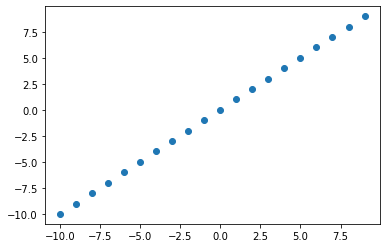

In [319]:
x = np.arange(-10, 10)
y = x
plt.scatter(x,y)

2) Graph for Y = X² :

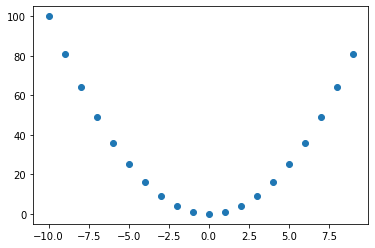

In [320]:
y = np.power(x, 2)
plt.scatter(x, y)

3) Graph for Y = X³ :

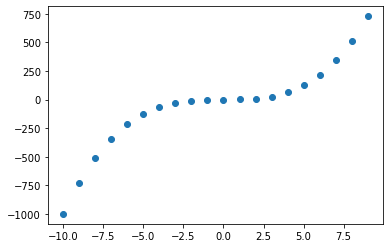

In [321]:
y = np.power(x, 3)
plt.scatter(x, y)

4) Graph with more than one polynomials : Y = X³+X²+X :

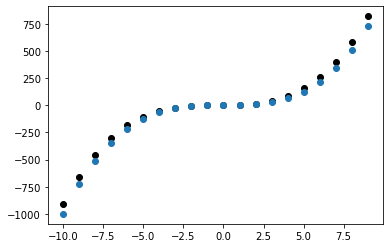

In [322]:
y1 = np.power(x, 3) + np.power(x, 2) + x
plt.scatter(x, y1, c='black')
plt.scatter(x, y)

Here we can clearly see that the  raise to power influence on the shape of our graph.<br>
Lets generate some data that is non linear

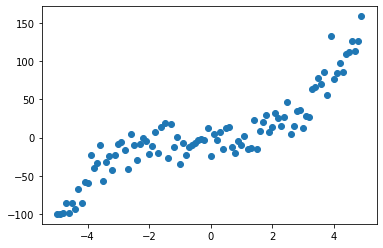

In [323]:
x       = np.arange(-5, 5, 0.1) 
y       = 1 + 1*(x) + 1*(x**2) + 1*(x**3)
y_noise = 15 * np.random.normal(size=len(x))
y       = y + y_noise
plt.scatter(x, y)

In [324]:
# x.ndim
# x.size
x.shape

(100,)

In [325]:
n      = len(x)
x_bias = np.ones((n, 1)) 

In [326]:
x_bias.shape

(100, 1)

In [327]:
x = np.reshape(x, (n,1))

In [328]:
x.shape

(100, 1)

In [329]:
X = np.append(x_bias, x , axis=1)

In [330]:
X

array([[ 1.00000000e+00, -5.00000000e+00],
       [ 1.00000000e+00, -4.90000000e+00],
       [ 1.00000000e+00, -4.80000000e+00],
       [ 1.00000000e+00, -4.70000000e+00],
       [ 1.00000000e+00, -4.60000000e+00],
       [ 1.00000000e+00, -4.50000000e+00],
       [ 1.00000000e+00, -4.40000000e+00],
       [ 1.00000000e+00, -4.30000000e+00],
       [ 1.00000000e+00, -4.20000000e+00],
       [ 1.00000000e+00, -4.10000000e+00],
       [ 1.00000000e+00, -4.00000000e+00],
       [ 1.00000000e+00, -3.90000000e+00],
       [ 1.00000000e+00, -3.80000000e+00],
       [ 1.00000000e+00, -3.70000000e+00],
       [ 1.00000000e+00, -3.60000000e+00],
       [ 1.00000000e+00, -3.50000000e+00],
       [ 1.00000000e+00, -3.40000000e+00],
       [ 1.00000000e+00, -3.30000000e+00],
       [ 1.00000000e+00, -3.20000000e+00],
       [ 1.00000000e+00, -3.10000000e+00],
       [ 1.00000000e+00, -3.00000000e+00],
       [ 1.00000000e+00, -2.90000000e+00],
       [ 1.00000000e+00, -2.80000000e+00],
       [ 1.

\begin{multline*}
\theta = (X^{\top}X)^{-1} X^{\top}y
\end{multline*}

In [331]:
X_T = np.transpose(X)

In [332]:
X_prod = X_T.dot(X)

In [333]:
X_INV = np.linalg.inv(X_prod)
X_PRE = X_T.dot(y)

In [362]:
#from sklearn.linear_model import LinearRegression


In [334]:
θ = X_INV.dot(X_PRE)
θ



array([ 5.72701152, 16.25931697])

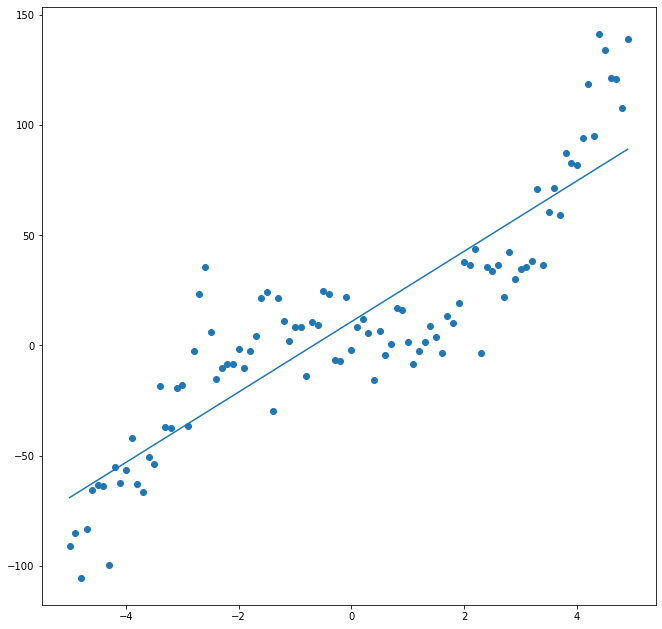

In [244]:
plt.figure(figsize=(11,11))
plt.scatter(x, y)

# h(x) = θ_0 + θ_1 * x
# y = b + mx
plt.plot(x, θ[0] + θ[1] * x)

In [338]:
def predict(x, intercept, slope):
    return  intercept + (x*slope)

In [339]:
prediction = predict(x, θ[0], θ[1])
prediction

array([[-75.56957332],
       [-73.94364162],
       [-72.31770993],
       [-70.69177823],
       [-69.06584653],
       [-67.43991484],
       [-65.81398314],
       [-64.18805144],
       [-62.56211975],
       [-60.93618805],
       [-59.31025635],
       [-57.68432466],
       [-56.05839296],
       [-54.43246126],
       [-52.80652957],
       [-51.18059787],
       [-49.55466617],
       [-47.92873448],
       [-46.30280278],
       [-44.67687108],
       [-43.05093939],
       [-41.42500769],
       [-39.79907599],
       [-38.1731443 ],
       [-36.5472126 ],
       [-34.9212809 ],
       [-33.2953492 ],
       [-31.66941751],
       [-30.04348581],
       [-28.41755411],
       [-26.79162242],
       [-25.16569072],
       [-23.53975902],
       [-21.91382733],
       [-20.28789563],
       [-18.66196393],
       [-17.03603224],
       [-15.41010054],
       [-13.78416884],
       [-12.15823715],
       [-10.53230545],
       [ -8.90637375],
       [ -7.28044206],
       [ -5

In [340]:
def get_error(y_pred,y):    
    error = (y_pred - y) ** 2
    return np.sum(error) / len(error)

In [341]:
error = get_error(prediction, y)
print(error)

504477.3634505738


In [342]:
x       = np.arange(-5, 5, 0.1) 
y       = 1 + 1*(x) + 1*(x**2) + 1*(x**3)
y_noise = 20 * np.random.normal(size=len(x))
y       = y + y_noise


Error is high. Let’s check what happens if we use polynomial equation. <br>
1) Initialize x,x²,x³ vectors

In [269]:
x1 = x
x2 = x1**2
x3 = x1**3

In [343]:
type(x1)

numpy.ndarray

In [345]:
n = len(x1)
n

100

In [346]:
x1_new = np.reshape(x1, (n, 1))
x2_new = np.reshape(x2, (n, 1))
x3_new = np.reshape(x3, (n, 1))

In [347]:
x1_new.shape

(100, 1)

In [348]:
x_bias = np.ones((n,1))

2) Form the complete x matrix :

In [349]:
x_n = np.append(x_bias, x1_new , axis=1)
x_n = np.append(x_n,    x2_new , axis=1)
x_n = np.append(x_n,    x3_new , axis=1)

In [295]:
x_n[:10, :]

array([[   1.   ,   -5.   ,   25.   , -125.   ],
       [   1.   ,   -4.9  ,   24.01 , -117.649],
       [   1.   ,   -4.8  ,   23.04 , -110.592],
       [   1.   ,   -4.7  ,   22.09 , -103.823],
       [   1.   ,   -4.6  ,   21.16 ,  -97.336],
       [   1.   ,   -4.5  ,   20.25 ,  -91.125],
       [   1.   ,   -4.4  ,   19.36 ,  -85.184],
       [   1.   ,   -4.3  ,   18.49 ,  -79.507],
       [   1.   ,   -4.2  ,   17.64 ,  -74.088],
       [   1.   ,   -4.1  ,   16.81 ,  -68.921]])

\begin{multline*}
\theta = (X^{\top}X)^{-1} X^{\top}y
\end{multline*}

In [351]:
X_T = x_n.T

In [352]:
X_prod = X_T.dot(x_n)

In [353]:
X_INV = np.linalg.inv(X_prod)
X_PRE = X_T.dot(y)

In [354]:
θ = X_INV.dot(X_PRE)
θ

array([-0.20439473,  0.99009772,  1.00064893,  0.92264395])

In [355]:
θ_0, θ_1, θ_2, θ_3 = θ

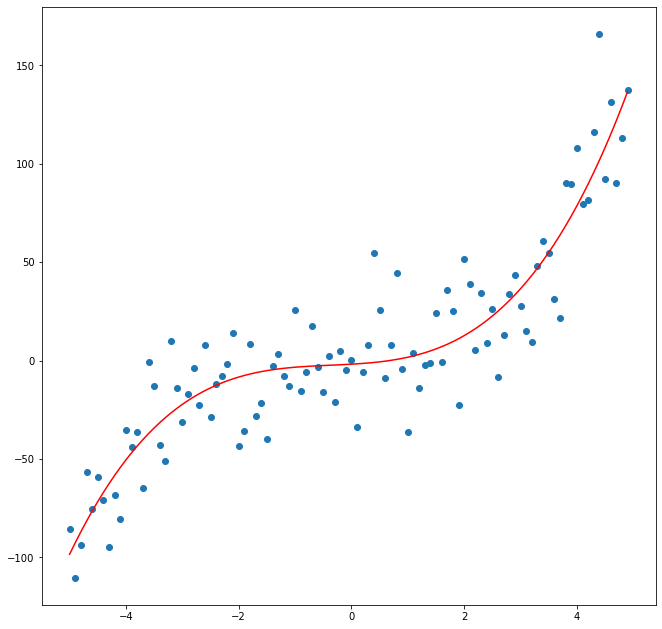

In [285]:
plt.figure(figsize=(11,11))
plt.scatter(x, y)
plt.plot(x, θ_0 + θ_1*x1 + θ_2*x2 + θ_3*x3, c='red')

In [356]:
def prediction(x1, x2, x3, θ_0, θ_1, θ_2, θ_3):
   return θ_0 + θ_1*x1 + θ_2*x2 + θ_3*x3

In [357]:
pred = prediction(x1,x2,x3,θ_0, θ_1, θ_2, θ_3)

In [359]:
error = get_error(pred, y)
error

360.44489680504176

In [ ]:
504477.3634505738 # line

360.44489680504176 # polynomial